<a href="https://colab.research.google.com/github/Achiever-caleb/Salary_Predictions/blob/main/Salary_prediction(linear_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Salary Prediction using linear regression

### Loading The various libraries and the dataset

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.graphics.correlation import plot_corr

In [2]:
df=pd.read_csv("/content/Salary_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


### Data Wrangling

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,30.0,14.500000,8.803408,0.0,7.25,14.5,21.75,29.0
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [6]:
df.nunique()

,0
Unnamed: 0,30
YearsExperience,28
Salary,30


In [7]:
df[df.duplicated()]

,Unnamed: 0,YearsExperience,Salary


## Data Cleaning

1. We noticed the column names are not following PEP8 guidlines so we have rename them.
2. The unnamed column is just a repetition of the index column, so we have to drop it in order to avoid our model overfitting


In [8]:
df.rename(columns={'YearsExperience':'experience','Salary':'salary'},inplace=True)
df.head()

,Unnamed: 0,experience,salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,experience,salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


### Data Analysis

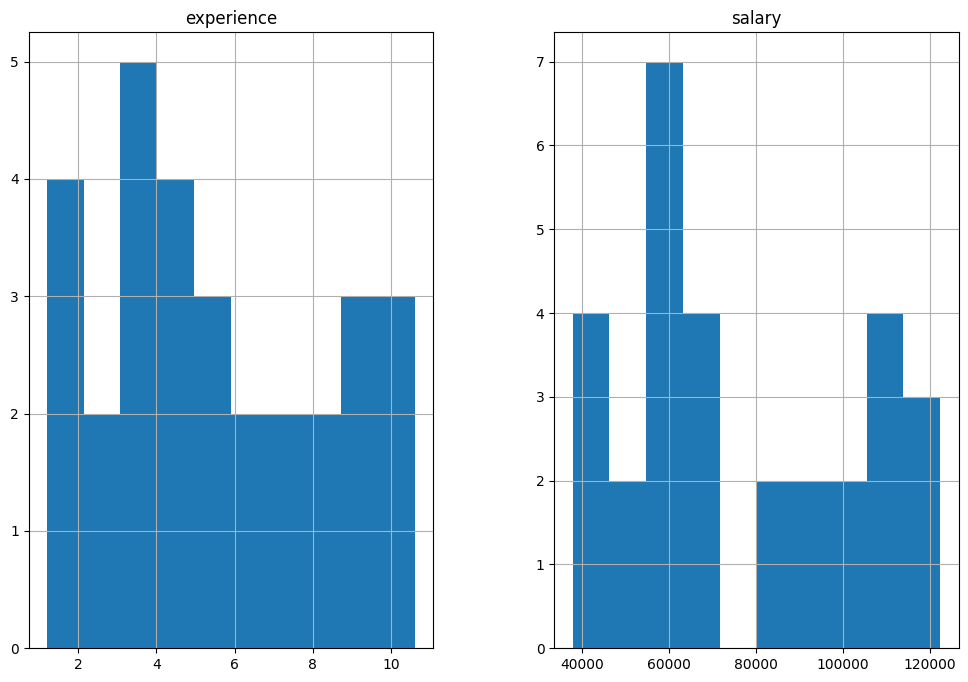

In [10]:
df.hist(figsize=(12,8))
plt.show()

In [11]:
corr_matrix = df.corr()

<Axes: xlabel='experience', ylabel='salary'>

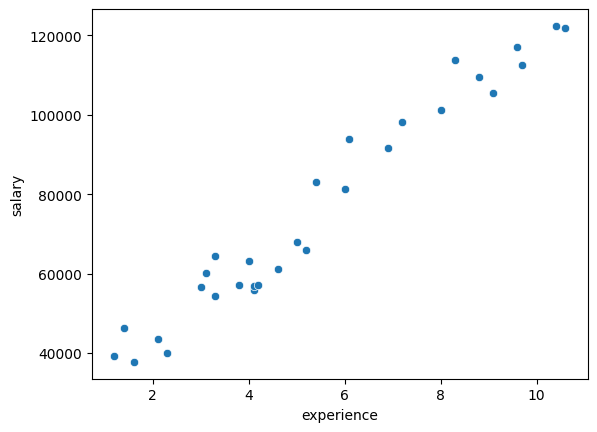

In [12]:
sns.scatterplot(x='experience',y='salary',data=df)

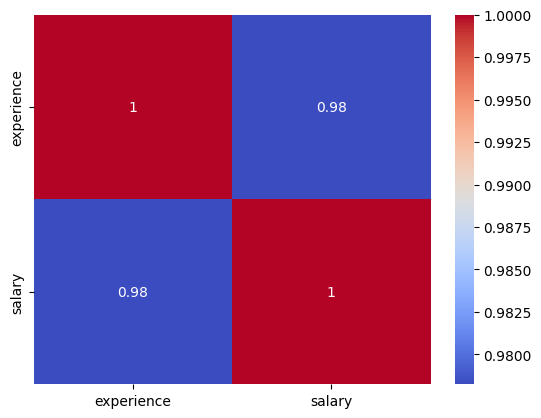

In [32]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Split the data

In [14]:
y= df['salary']
X=df.drop('salary', axis=1)
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (30, 1)
Shape of y =  (30,)


### Training the model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24,)
(6,)


In [18]:
lm=LinearRegression()

In [19]:
model = lm.fit(X_train,y_train)

In [20]:
model

LinearRegression()

### Evaluate Model

In [21]:
predictions = model.predict(X_test)

In [22]:
predictions

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

In [24]:
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, predictions)

print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"R2: {R2}")

MAE: 6286.453830757745
MSE: 49830096.855908394
RMSE: 7059.04362190151
R2: 0.9024461774180497


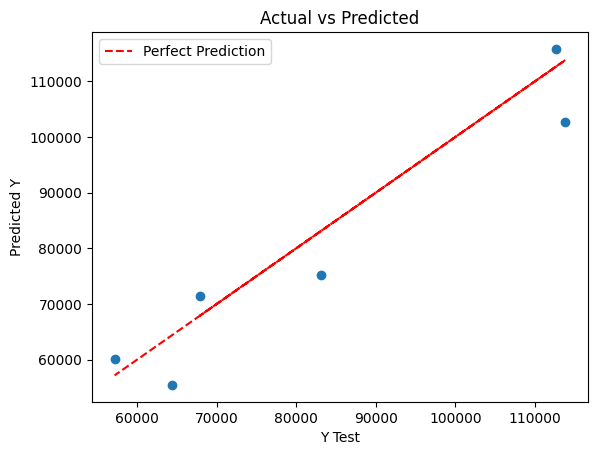

In [29]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r', linestyle="--", label="Perfect Prediction")
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

### Conclusion

1. With a Mean Average Error of 6286.453830757745, This implies that our model's predictions are off by 6286 unit of loan size.

2. Our RMSE is 7059.04362190151, this implies that the model, on average, makes an error of around 7,059 loan size units in its predictions.

3. Our R2 score is  0.9024461774180497, This shows that 90.2% of the variation in the loan size is explained by the model. This indicates a strong fit.